In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time


## Torch libraries

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import torch.utils.data as data

# Generating the data base:
## First, we download the original images and fixation maps.
This requires having internet connexion

Size of the Folder 'ALLSTIMULI' : 225 Mo

Size of the Folder 'ALLFIXATIONMAPS' : 23,6 Mo

In [4]:
if not(os.path.exists('ALLSTIMULI')):
    from io import BytesIO
    from zipfile import ZipFile
    from urllib.request import urlopen
    img='http://people.csail.mit.edu/tjudd/WherePeopleLook/ALLSTIMULI.zip'
    resp = urlopen(img)
    zipfile = ZipFile(BytesIO(resp.read()))
    zipfile.extractall()
    print('Download of ALLSTIMULI complete')
if not(os.path.exists('ALLFIXATIONMAPS')):
    from io import BytesIO
    from zipfile import ZipFile
    from urllib.request import urlopen
    img='http://people.csail.mit.edu/tjudd/WherePeopleLook/ALLFIXATIONMAPS.zip'
    resp = urlopen(img)
    zipfile = ZipFile(BytesIO(resp.read()))
    zipfile.extractall()
    print('Download of ALLFIXATIONMAPS complete')

## Then, we generate the global images data base.
The images and fixations are 1003 grey images in numpy files of size 256x256, with memory space of 65 Ko each.

In total, we have:

GLOBAL_IMAGES :  59,7 Mo

GLOBAL_FIXATIONMAPS :    59,7 Mo

GLOBAL_IMAGES_TEST :        3,06 Mo

GLOBAL_FIXATIONMAPS_TEST : 3,06 Mo

In total we have 125.72 Mo

In [5]:
#size used for downsizing images
size=256

test_sample_ratio=5/100
#folder names
imdir_org,fixdir_org='ALLSTIMULI/ALLSTIMULI','ALLFIXATIONMAPS/ALLFIXATIONMAPS'
#imdir_new,fixdir_new='GLOBAL_IMAGES','GLOBAL_FIXATIONMAPS'
#imdir_test,fixdir_test='GLOBAL_IMAGES_TEST','GLOBAL_FIXATIONMAPS_TEST'
#creating empty folders:

imdir, fixdir = 'GLOBAL_IMAGES_ALL_PLAIN','GLOBAL_FIXATIONMAPS_ALL_PLAIN'
imdir_white, fixdir_white = 'GLOBAL_IMAGES_ALL_WHITE','GLOBAL_FIXATIONMAPS_ALL_WHITE'



In [6]:
for directory in [imdir,fixdir]:
    if not os.path.exists(directory):
        os.makedirs(directory)
#image and fixation names
import fnmatch #fnmatch to keep only image files
image_files =fnmatch.filter(os.listdir(imdir_org), '*.jpeg')
fixation_files = []
for image_name in image_files:
    fixation_files.append(image_name[:-5] +'_fixMap.jpg')
#number of images : 1003
N=len(image_files)
#N_test=int(l*test_sample_ratio)
#N_train=l-N_test
print('Total number of images :', N)
#import SLIP for whitening and PIL for resizing
import SLIP
import PIL
#default parameters for the whitening
im = SLIP.Image(pe='https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py')

Total number of images : 1003


In [7]:
#print(os.listdir(imdir_org))

In [8]:
if False : #not os.path.exists(imdir):
    for idx in range(N):
        if idx%100==0:
            print('Avancement=',int(idx/N*100),'%')
        #check if file exists
        '''if idx<=N_train:
            img_dir,fix_dir=imdir_new,fixdir_new
        else:
            img_dir,fix_dir=imdir_test,fixdir_test'''
        #if not (os.path.exists(os.path.join(img_dir,image_files[idx][:-5])) and os.path.exists(os.path.join(fix_dir,fixation_files[idx][:-4])) ):
        #loading images and fixations
        img_name = os.path.join(imdir_org,image_files[idx])
        fix_name = os.path.join(fixdir_org,fixation_files[idx])
        image = PIL.Image.open(img_name)
        fixation=PIL.Image.open(fix_name)
        #resizing
        image=image.resize((size,size))
        fixation=fixation.resize((size,size))
        #saving in a temporary file:
        image.save('temp_image.jpeg')
        #whitening
        image=im.imread('temp_image.jpeg')
            ##whitening only works for pair shape
        raws=image.shape[0]
        columns=image.shape[1]
        if raws%2!=0:
            image=image[:-1,:]
            fixation=fixation[:-1,:]
        if columns%2!=0:
            image=image[:,:-1]
            fixation=fixation[:,:-1]
        raws=image.shape[0]
        columns=image.shape[1]
        im.set_size((raws,columns))
            ##apply whitening
        image = im.whitening(image)
        image = ((image - image.min()) * (1/(image.max() - image.min()) * 255)).astype('uint8')
        #saving
        '''if idx<=N_train:
            img_dir,fix_dir=imdir_new,fixdir_new
        else:
            img_dir,fix_dir=imdir_test,fixdir_test'''
        np.save(os.path.join(imdir,image_files[idx][:-5]), np.array(image,dtype=np.uint8))
        np.save(os.path.join(fixdir,fixation_files[idx][:-4]), np.array(fixation,dtype=np.uint8))
    print('Avancement= 100 %')
    print('COMPLETE : GLOBAL IMAGES AND FIXATION MAPS GENERATED SUCCESSFULLY.')

### Tests

In [9]:
i = 0

'''image_ref_dir = imdir_org
image_ref_names=os.listdir(image_ref_dir)
image_ref=np.load(os.path.join(image_ref_dir,image_ref_names[i]))

fix_ref_dir = fixdir_org
fix_ref_names=os.listdir(fix_ref_dir)
fix_ref=np.load(os.path.join(fix_ref_dir,fix_ref_names[i]))'''

image_dir = imdir #imdir_new
image_names=os.listdir(image_dir)
image=np.load(os.path.join(image_dir,image_names[i]))

image_dir_white = imdir_white #imdir_new
image_white_names=os.listdir(image_dir_white)
image_white=np.load(os.path.join(image_dir_white,image_names[i]))

fix_dir = fixdir #fixdir_new
fix_names=os.listdir(fix_dir)
fix=np.load(os.path.join(fix_dir,fix_names[i]))


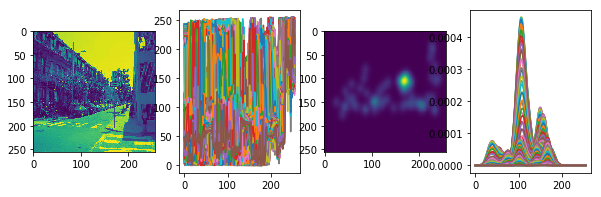

In [10]:
plt.figure(figsize = (10,3))
'''plt.subplot(141)
plt.imshow(image_ref)
plt.subplot(142)
_ = plt.plot(fix_ref)'''
plt.subplot(141)
plt.imshow(image)
plt.subplot(142)
_ = plt.plot(image)
plt.subplot(143)
plt.imshow(fix)
plt.subplot(144)
_ = plt.plot(fix/sum(fix.flatten()))

(array([106]), array([180]))
180


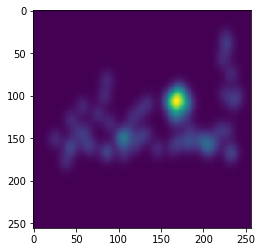

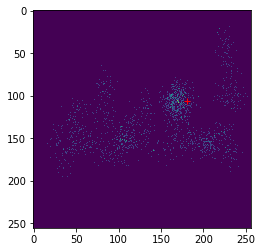

In [11]:
plt.imshow(fix)
m = fix/sum(fix.flatten())
m = m.flatten()

'''for i in range(20):
    print(np.where(np.random.multinomial(1, m) == 1)[0][0])'''

m_mult = np.random.multinomial(2000, m)
plt.figure()
plt.imshow(m_mult.reshape(256, 256))

m_mult = np.random.multinomial(1, m).reshape(256, 256)
print(np.where(m_mult == 1))
coord = np.where(m_mult == 1)
plt.plot(coord[1], coord[0], 'r+')
print(coord[1][0])
    

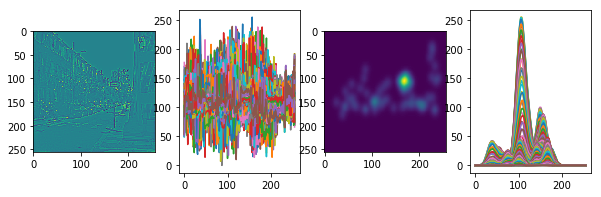

In [12]:
plt.figure(figsize = (10,3))
'''plt.subplot(141)
plt.imshow(image_ref)
plt.subplot(142)
_ = plt.plot(fix_ref)'''
plt.subplot(141)
plt.imshow(image_white)
plt.subplot(142)
_ = plt.plot(image_white)
plt.subplot(143)
plt.imshow(fix)
plt.subplot(144)
_ = plt.plot(fix)

## Vision stuff

In [13]:
from LogGabor import LogGabor

In [14]:
N_theta, N_azimuth, N_eccentricity, N_phase, N_X, N_Y, rho = 6, 24, 15, 2, 256, 256, 1.21 #1.41 #1.25 #
#N_theta, N_azimuth, N_eccentricity, N_phase, N_X, N_Y, rho = 6, 12, 8, 2, 256, 256, 1.41
verbose = 1
OFFSET_STD = 15
OFFSET_MAX = 30

## Pierre's stuff

### Encoding : N_theta x N_azimuth x N_eccentricity x N_phase  2D filters (to be applied on N_X x N_Y pixels)

#### Préparer l'apprentissage et les fonctions nécessaires au fonctionnement du script

In [15]:
def vectorization(N_theta=N_theta, N_azimuth=N_azimuth, N_eccentricity=N_eccentricity, N_phase=N_phase, \
                  N_X=N_X, N_Y=N_Y, rho=rho, ecc_max=1, B_sf=.4, B_theta=np.pi/N_theta/2):
    retina = np.zeros((N_theta, N_azimuth, N_eccentricity, N_phase, N_X*N_Y))
    parameterfile = 'https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py'
    lg = LogGabor(parameterfile)
    lg.set_size((N_X, N_Y))
    # params = {'sf_0': .1, 'B_sf': lg.pe.B_sf,
    #           'theta': np.pi * 5 / 7., 'B_theta': lg.pe.B_theta}
    # phase = np.pi/4
    # edge = lg.normalize(lg.invert(lg.loggabor(
    #     N_X/3, 3*N_Y/4, **params)*np.exp(-1j*phase)))

    for i_theta in range(N_theta):
        for i_azimuth in range(N_azimuth):
            for i_eccentricity in range(N_eccentricity):
                ecc = ecc_max * (1/rho)**(N_eccentricity - i_eccentricity)
                r = np.sqrt(N_X**2+N_Y**2) / 2 * ecc  # radius
                sf_0 = 0.5 * 0.03 / ecc
                x = N_X/2 + r * \
                    np.cos((i_azimuth+(i_eccentricity % 2)*.5)*np.pi*2 / N_azimuth)
                y = N_Y/2 + r * \
                    np.sin((i_azimuth+(i_eccentricity % 2)*.5)*np.pi*2 / N_azimuth)
                for i_phase in range(N_phase):
                    params = {'sf_0': sf_0, 'B_sf': B_sf,
                              'theta': i_theta*np.pi/N_theta, 'B_theta': B_theta}
                    phase = i_phase * np.pi/2
                    # print(r, x, y, phase, params)

                    retina[i_theta, i_azimuth, i_eccentricity, i_phase, :] = lg.normalize(
                        lg.invert(lg.loggabor(x, y, **params)*np.exp(-1j*phase))).ravel()


    return retina

#### Full encoding

In [16]:
#del retina

In [17]:
FIC_NAME = 'retina_256_24_ecc_15.npy'
if not os.path.exists(FIC_NAME):
    retina = vectorization(N_theta, N_azimuth, N_eccentricity, N_phase, N_X, N_Y, rho) #, ecc_max=1)
    np.save(FIC_NAME, retina)
else:
    retina = np.load(FIC_NAME)
print(retina.shape)


(6, 24, 15, 2, 65536)


In [18]:
retina_vector = retina.reshape((N_theta*N_azimuth*N_eccentricity*N_phase, N_X*N_Y))
print(retina_vector.shape)

(4320, 65536)


In [19]:
FIC_NAME = 'retina_inverse_256_24_ecc_15.npy'
if not os.path.exists(FIC_NAME):
    retina_inverse = np.linalg.pinv(retina_vector)
    np.save(FIC_NAME, retina_inverse)
else:
    retina_inverse = np.load(FIC_NAME)
print(retina_inverse.shape)

(65536, 4320)


#### Orientation invariant power encoding (colliculus??)

In [20]:
colliculus = (retina**2).sum(axis=(0, 3))
colliculus = colliculus**.5
colliculus /= colliculus.sum(axis=-1)[:, :, None]
print(colliculus.shape)

(24, 15, 65536)


In [21]:
colliculus_vector = colliculus.reshape((N_azimuth*N_eccentricity, N_X*N_Y))
print(colliculus_vector.shape)

(360, 65536)


In [22]:
colliculus_inverse = np.linalg.pinv(colliculus_vector)
print(colliculus_inverse.shape)

(65536, 360)


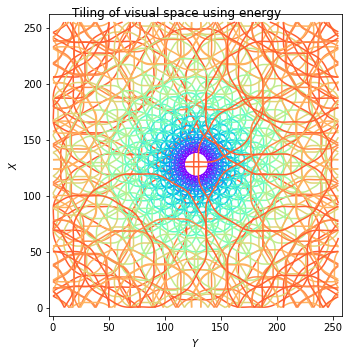

In [23]:
energy = colliculus ** 2
energy /= energy.sum(axis=-1)[:, :, None]
energy_vector = energy.reshape((N_azimuth*N_eccentricity, N_X*N_Y))
energy_plus = np.linalg.pinv(energy_vector)
FIG_WIDTH = 5 

fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
for i_orient in range(N_azimuth):
    for i_scale in range(N_eccentricity):
        env = np.sqrt(energy[i_orient, i_scale, :]**2.5).reshape((N_X, N_Y))
        ax.contour(energy[i_orient, i_scale, :].reshape((N_X, N_Y)), levels=[env.max()/2], lw=1,
                  colors=[plt.cm.rainbow(i_scale * 1.5/N_azimuth)])
fig.suptitle('Tiling of visual space using energy')
ax.set_xlabel(r'$Y$')
ax.set_ylabel(r'$X$')
ax.axis('equal')
plt.tight_layout()

## Images dataset

In [116]:
def minmax(value, border):
    value = max(value, -border)
    value = min(value, border)
    return int(value)

In [117]:
np.random.rand() > 0.5

False

In [118]:
#im = SLIP.Image(pe='https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py')

class Transform(object):
    """Rescale the image through LogGabors

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self):
        #assert isinstance(output_size, (int, tuple))
        #self.output_size = output_size
        pass

    def __call__(self, sample):
        image, image_white, fixmap = sample['image'], sample['image_white'], sample['fixation']
        
        #i_offset = minmax(np.random.randn() * OFFSET_STD, OFFSET_MAX)
        #j_offset = minmax(np.random.randn() * OFFSET_STD, OFFSET_MAX)
        
        if np.random.rand() > 0.5:
            image_white = np.fliplr(image_white)
            image = np.fliplr(image)
            fixmap = np.fliplr(fixmap)
        
        m = fixmap/sum(fixmap.flatten())
        m = m.flatten()
        m_mult = np.random.multinomial(1, m).reshape(256, 256)
        coord = np.where(m_mult == 1)
        i_offset = 127 - coord[0][0]
        j_offset = 127 - coord[1][0]
        
        '''i_offset = 0
        j_offset = -50'''
        
        image_white = np.roll(image_white, i_offset, axis=0)
        image_white = np.roll(image_white, j_offset, axis=1)       
        image_retina = retina_vector @ np.ravel(image_white)
        image_retina /= np.std(image_retina)
        
        image = np.roll(image, i_offset, axis=0)
        image = np.roll(image, j_offset, axis=1)     
        image_colliculus = colliculus_vector @ np.ravel(image)
        #image_colliculus -= np.mean(image_colliculus)
        image_colliculus /= np.std(image_colliculus)
        
        fixmap = np.roll(fixmap, i_offset, axis=0)
        fixmap = np.roll(fixmap, j_offset, axis=1)     
        fixmap_colliculus = colliculus_vector @ np.ravel(fixmap)
        
        if True:
            m_coll = fixmap_colliculus/sum(fixmap_colliculus)
            m_coll_mult = np.random.multinomial(25, m_coll)
            m_coll_mult[np.where(m_coll_mult > 1)] = 1
            return {'image': image_colliculus, 'image_white': image_retina, 'fixation': m_coll_mult}   
        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        else:
            return {'image': image_colliculus, 'image_white': image_retina, 'fixation': fixmap_colliculus}
        #r 

In [119]:
## test

In [120]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, image_white, fixmap = sample['image'], sample['image_white'], sample['fixation']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        #image = image.transpose((2, 0, 1))
        
        return {'image': torch.from_numpy(image),
                'image_white': torch.from_numpy(image_white),
                'fixation': torch.from_numpy(landmarks)}

In [121]:
class ImageDataset(data.Dataset):
    """image dataset."""

    def __init__(self, imdir, imdir_white, fixdir, transform=None, index = None):
        """
        Args:
            imdir (string): Path to the image folder
            fixdir (string): Path to the fixation maps folder
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.imdir = imdir
        self.fixdir = fixdir
        self.imdir_white = imdir_white
        if index is None :
            print('OK')
            self.image_names=os.listdir(imdir)
            self.fix_names=os.listdir(fixdir)
        else:
            self.image_names=np.array(os.listdir(imdir))[index]
            self.fix_names=np.array(os.listdir(fixdir))[index]
        self.transform = transform # we do not use transforms
        #self.data_loader=data.DataLoader(self,batch_size=batch_size) : did not work
        
    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image=np.load(os.path.join(self.imdir,self.image_names[idx]))
        image_white=np.load(os.path.join(self.imdir_white,self.image_names[idx]))
        fix_map=np.load(os.path.join(self.fixdir,self.fix_names[idx]))/255 # to transform between 0 and 1 (for the BCELoss to work)

        sample = {'image': image, 'image_white': image_white, 'fixation': fix_map}

        if self.transform:
            sample = self.transform(sample)
        
        return sample


### Tests

In [122]:
trans = Transform()
dataset = ImageDataset(image_dir,image_dir_white,fix_dir)

OK


In [123]:
i = 0
sample = dataset[i] #['image'], dataset[i]['fixation'] 

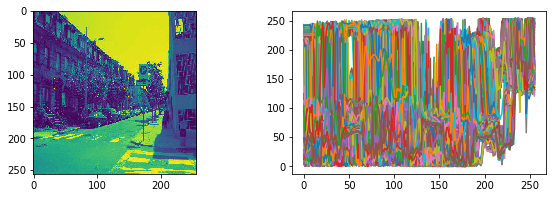

In [124]:
plt.figure(figsize = (10,3))
plt.subplot(121)
plt.imshow(sample['image'])
plt.subplot(122)
_ = plt.plot(sample['image'])

-22 2
15


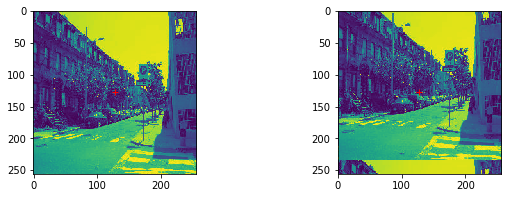

In [125]:
image_off = sample['image']
i_offset = minmax(np.random.randn() * OFFSET_STD, OFFSET_MAX)
j_offset = minmax(np.random.randn() * OFFSET_STD, OFFSET_MAX)
print(i_offset, j_offset)
print(OFFSET_STD)
image_off = np.roll(image_off, i_offset, axis=0)
image_off = np.roll(image_off, j_offset, axis=1)     
plt.figure(figsize = (10,3))
plt.subplot(121)
plt.imshow(sample['image'])
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')
plt.subplot(122)
plt.imshow(image_off)
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

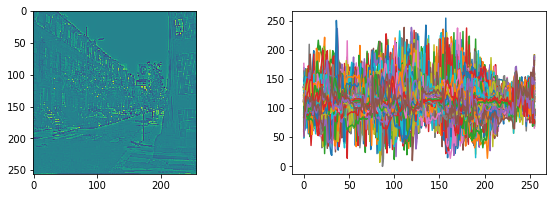

In [126]:
plt.figure(figsize = (10,3))
plt.subplot(121)
plt.imshow(sample['image_white'])
plt.subplot(122)
_ = plt.plot(sample['image_white'])

In [127]:
'''train = True
batch_size = 10
data_loader = torch.utils.data.DataLoader(dataset, train=train, download=True, batch_size=batch_size, shuffle=True)'''
dataloader = data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=4)

In [128]:
batch = next(iter(dataloader))

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7efe0c2a1d30>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 345, in get
    return ForkingPickler.loads(res)
  File "/usr/local/lib/python3.5/dist-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.5/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  File 

In [129]:
batch['image'].shape

torch.Size([10, 256, 256])

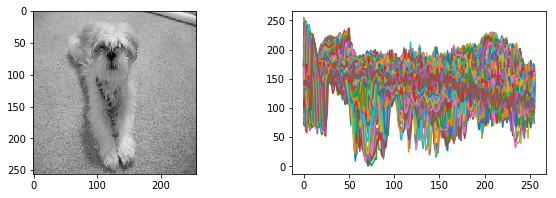

In [130]:
plt.figure(figsize = (10,3))
plt.subplot(121)
plt.imshow(batch['image'][0,:,:], cmap = 'gray')
plt.subplot(122)
_ = plt.plot(batch['image'][0,:,:])

### Encoding test

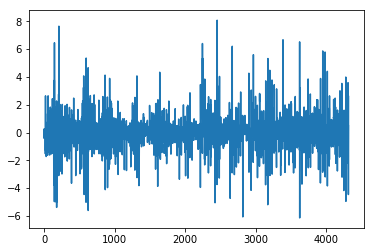

In [131]:
trans = Transform()
sample_retina = trans(sample) #retina_vector @ np.ravel(sample['image'])
plt.plot(sample_retina['image_white'])

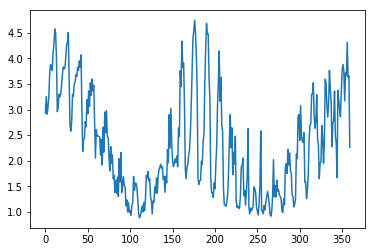

In [132]:
trans = Transform()
sample_retina = trans(sample) #retina_vector @ np.ravel(sample['image'])
plt.plot(sample_retina['image'])

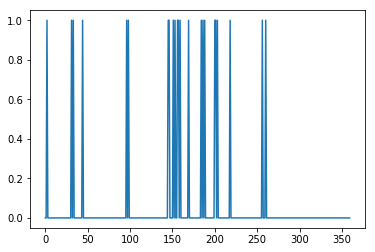

In [133]:
#data_colliculus = colliculus_vector @ np.ravel(sample['fixation'])
plt.plot(sample_retina['fixation'])

In [134]:
### Polar plot

In [135]:
N_eccentricity * N_azimuth

360

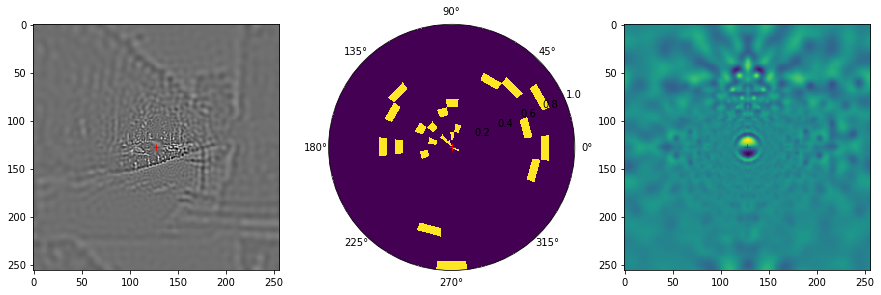

In [136]:
sample_retina = trans(sample)
delta = 1/N_azimuth
log_r, theta = np.meshgrid(np.linspace(0, 1, N_eccentricity + 1), np.linspace(-np.pi*(.5 + delta), np.pi*(1.5 - delta), N_azimuth + 1))
f = plt.figure(figsize = (15,5))

plt.subplot(131)
data_retina = sample_retina['image_white']
image_white = retina_inverse @ data_retina
#im = colliculus_inverse @ data_retina
plt.imshow(image_white.reshape(N_X, N_Y), cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

ax = f.add_subplot(132, projection='polar')
vec = sample_retina['fixation']
ax.pcolor(theta, log_r, vec.reshape((N_azimuth, N_eccentricity)))
plt.plot(0,0, 'r+')

ax = f.add_subplot(133)
plt.imshow((colliculus_inverse @ vec).reshape(N_X, N_Y) )#sample['fixation'])
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

In [137]:
colliculus_inverse @ vec

array([ -8.55870062,  -5.58554414,  -3.12281115, ..., -19.33483916,
       -15.30109219, -11.42868259])

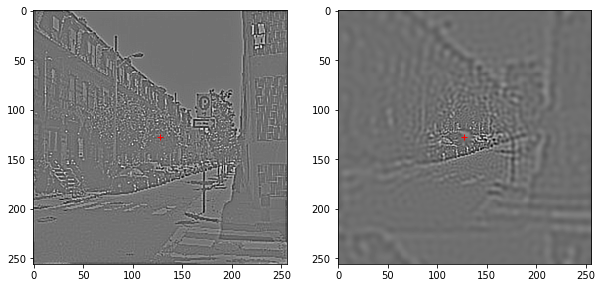

In [138]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(sample['image_white'], cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

plt.subplot(122)
data_retina = sample_retina['image_white']
image_white = retina_inverse @ data_retina
#im = colliculus_inverse @ data_retina
plt.imshow(image_white.reshape(N_X, N_Y), cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

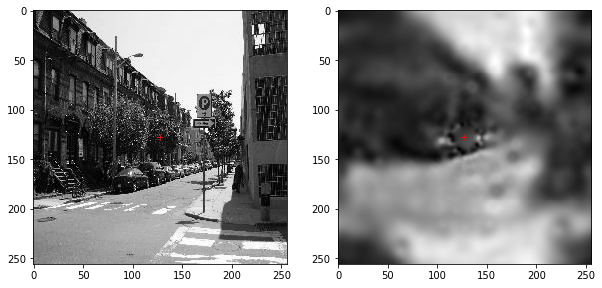

In [139]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(sample['image'], cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

plt.subplot(122)
data_retina = sample_retina['image']
image = colliculus_inverse @ data_retina
#im = colliculus_inverse @ data_retina
plt.imshow(image.reshape(N_X, N_Y), cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

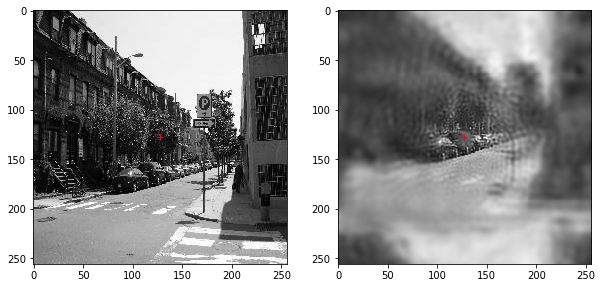

In [140]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(sample['image'], cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')

plt.subplot(122)
plt.imshow(10 * image_white.reshape(N_X, N_Y)+image.reshape(N_X, N_Y), cmap = 'gray')
plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')


In [141]:
if False:
    transform = Transform()
    batch_size = 100
    dataset = ImageDataset(image_dir, image_dir_white, fix_dir, transform = transform)
    dataloader = data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    batch = next(iter(dataloader))

In [142]:
if False :
    fixmap_avg = sum(batch['fixation'])/batch_size

    f = plt.figure(figsize = (15, 5))

    i = 3

    plt.subplot(131)
    #for i in range(10):
    plt.plot(batch['fixation'][i,:], 'g')
    plt.plot(batch['fixation'][i,:] - fixmap_avg)
    plt.plot(fixmap_avg,'r')

    ax = f.add_subplot(132, projection='polar')
    vec = batch['fixation'][i,:] 
    ax.pcolor(theta, log_r, vec.reshape((N_azimuth, N_eccentricity)))
    plt.plot(0,0, 'r+')

    ax = f.add_subplot(133, projection='polar')
    vec = batch['fixation'][i,:] - fixmap_avg
    ax.pcolor(theta, log_r, vec.reshape((N_azimuth, N_eccentricity)))
    plt.plot(0,0, 'r+')



#### Input vectors encoding

In [143]:
'''def image_fullfield(image):
    image_retina = retina_vector @ np.ravel(image)
    return image_retina'''

'def image_fullfield(image):\n    image_retina = retina_vector @ np.ravel(image)\n    return image_retina'

#### Output vectors (Accuracy/Saliency map) encoding

In [144]:
'''def fixmap_fullfield(fixmap):   
    fixmap_colliculus = colliculus_vector @ np.ravel(fixmap)
    return fixmap_colliculus'''

'def fixmap_fullfield(fixmap):   \n    fixmap_colliculus = colliculus_vector @ np.ravel(fixmap)\n    return fixmap_colliculus'

In [145]:
'''def couples(image, fixmap): #, device):
    #data = data.to(device)
    v = image_fullfield(data)
    a = fixmap_fullfield(fixmap)
    return (v, a)'''

'def couples(image, fixmap): #, device):\n    #data = data.to(device)\n    v = image_fullfield(data)\n    a = fixmap_fullfield(fixmap)\n    return (v, a)'

#### Hyperparameters

In [146]:
minibatch_size = 25  # quantity of examples that'll be processed
lr = 1e-4 #0.05

n_hidden1_white = 2000 #800 #
n_hidden1 = 500 #200 #
n_hidden2 = 500 #50 #
n_hidden3 = 50  #10 #50
n_hidden4 = 500 #50

print('n_hidden1', n_hidden1, ' / n_hidden2', n_hidden2)
verbose = 1
train = True

n_hidden1 500  / n_hidden2 500


In [147]:
torch.cuda.is_available()

False

In [148]:
do_cuda = torch.cuda.is_available()
kwargs = {'num_workers': 4, 'pin_memory': True} if do_cuda else {}
device = torch.cuda.device("cuda" if do_cuda else "cpu")

In [149]:
transform = Transform()

image_dir = imdir #'GLOBAL_IMAGES_ALL'
fix_dir = fixdir #'GLOBAL_FIXATIONMAPS_ALL'

'''image_names=os.listdir(image_dir)
print (len(image_names))
fix_names=os.listdir(fix_dir)
print (len(fix_names))
for i in range(len(image_names)):
    if image_names[i][:7] != fix_names[i][:7]:
        print(image_names[i], fix_names[i])'''

n = len(os.listdir(image_dir))
index = np.arange(n)
np.random.shuffle(index)
print(index)
index_train = index[:800]
index_test = index[800:]

train_dataset = ImageDataset(image_dir, image_dir_white, fix_dir, transform = transform, index = index_train)
train_loader = data.DataLoader(train_dataset, batch_size=minibatch_size, shuffle=True, num_workers=4)

test_dataset = ImageDataset(image_dir, image_dir_white, fix_dir, transform = transform, index = index_test)
test_loader = data.DataLoader(test_dataset, batch_size = len(test_dataset), shuffle=True, num_workers=4)

[603  25 818 ...,  73 146 957]


In [150]:
len(train_dataset)

800

In [151]:
'''for batch_idx, batch in enumerate(train_loader):
    print (batch_idx)'''

'for batch_idx, batch in enumerate(train_loader):\n    print (batch_idx)'

#### Network

In [152]:
BIAS = True

class Net(torch.nn.Module):
    
    def __init__(self, n_feature, n_hidden1, n_hidden1_white, n_hidden2, n_hidden3, n_hidden4, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature // N_theta // N_phase, n_hidden1, bias = BIAS)
        self.hidden1_white = torch.nn.Linear(n_feature, n_hidden1_white, bias = BIAS)
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2, bias = BIAS)
        self.hidden2_white = torch.nn.Linear(n_hidden1_white, n_hidden2, bias = BIAS)
        self.hidden3 = torch.nn.Linear(n_hidden2, n_hidden3, bias = BIAS)
        self.hidden4 = torch.nn.Linear(n_hidden3, n_hidden4, bias = BIAS)
        self.predict = torch.nn.Linear(n_hidden4, n_output, bias = BIAS)
        #self.dropout = nn.Dropout(p = 0.5) 
        
    def forward(self, image, image_white):
        data_white = F.relu(self.hidden1_white(image_white))
        data = F.relu(self.hidden1(image))
        data = F.relu(self.hidden2(data) + self.hidden2_white(data_white))
        data = F.dropout(data, p = .5) #self.dropout)
        #data = F.relu(self.hidden3(data))
        data = self.hidden3(data)
        data = F.relu(self.hidden4(data))
        data =  self.predict(data)
        return data


In [153]:
net = Net(n_feature=N_theta*N_azimuth*N_eccentricity*N_phase,\
          n_hidden1=n_hidden1,\
          n_hidden1_white=n_hidden1_white,\
          n_hidden2=n_hidden2,\
          n_hidden3=n_hidden3,\
          n_hidden4=n_hidden4,\
          n_output=N_azimuth*N_eccentricity)

In [154]:
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [155]:
loss_func = torch.nn.BCEWithLogitsLoss()

In [156]:
def train(net, minibatch_size, \
          optimizer=optimizer, \
          vsize = N_theta * N_azimuth * N_eccentricity * N_phase,\
          asize = N_azimuth * N_eccentricity, \
          verbose=1):
    
    t_start = time.time()
    
    if verbose: print('Starting training...')
    
    for batch_idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
       
        log_image_batch = batch['image'].float()
        log_image_batch_white = batch['image_white'].float()
        log_fixmap_batch = batch['fixation'].float()
        
        prediction = net(log_image_batch, log_image_batch_white)
        loss = loss_func(prediction, log_fixmap_batch) 

        loss.backward()
        optimizer.step()

        if verbose and batch_idx % 10 == 0:
            print('[{}/{}] Loss: {} Time: {:.2f} mn'.format(
                batch_idx * minibatch_size, len(train_loader.dataset),
                loss.data.numpy(), (time.time()-t_start)/60))
    return net


In [157]:
def test(net, minibatch_size, optimizer=optimizer,
         vsize=N_theta*N_azimuth*N_eccentricity*N_phase,
         asize=N_azimuth*N_eccentricity):
    #for batch_idx, (data, label) in enumerate(test_loader):
    batch = next(iter(test_loader))
    batch_size = len(batch)
    
    '''log_image_batch = np.zeros((batch_size, 1, vsize))
    log_fixmap_batch = np.zeros((batch_size, 1, asize))
    
    for idx in range(batch_size):
        log_image_batch[idx, 0, :], log_fixmap_batch[idx, 0, :] = couples(batch['image'][idx, :, :], batch['fixation'][idx, :, :])
        #input_[idx, 0, :], a_data[idx, 0, :] = couples(data[idx, 0, :], i_offset, j_offset)
        #target[idx, :] = a_data[idx, 0, :]'''


    prediction = net(batch['image'].float(), batch['image_white'].float())
    loss = loss_func(prediction, batch['fixation'].float())

    return loss.data.numpy()


In [158]:
'''REDRAW = True
CONTINUE = False
EPOCHS = 1
FIC_NAME = '2018-11-20-Malek recap.npy'

def entraine():
    for epoch in range(EPOCHS) :#range(1, 100):
        print(epoch)
        train(net, minibatch_size)
        Accuracy = test(net, minibatch_size)
        print('Test set: Final Accuracy: {:.3f}'.format(Accuracy * 1.)) # print que le pourcentage de réussite final
        torch.save(net, FIC_NAME)  

if not os.path.exists(FIC_NAME) or REDRAW:
    print('OK')
    entraine()    
else:
    net = torch.load(FIC_NAME)   
    if CONTINUE:
        entraine()'''
        
FIC_NAME = '2018-11-20-Malek recap.npy'
EPOCHS = 150

if True: #not os.path.exists(FIC_NAME):
    for epoch in range(EPOCHS) :#range(1, 100):
        print(epoch)
        train(net, minibatch_size)
        Accuracy = test(net, minibatch_size)
        print('Test set: Final Accuracy: {:.3f}'.format(Accuracy * 1.)) # print que le pourcentage de réussite final
        torch.save(net, FIC_NAME)    
else:
    net = torch.load(FIC_NAME)    

0
Starting training...
[0/800] Loss: 0.6917062401771545 Time: 0.36 mn
[250/800] Loss: 0.589981198310852 Time: 1.03 mn
[500/800] Loss: 0.38920092582702637 Time: 1.97 mn
[750/800] Loss: 0.2783777117729187 Time: 2.56 mn
Test set: Final Accuracy: 0.273
1
Starting training...
[0/800] Loss: 0.2558153569698334 Time: 0.35 mn
[250/800] Loss: 0.2691720128059387 Time: 1.01 mn
[500/800] Loss: 0.2454349398612976 Time: 1.96 mn
[750/800] Loss: 0.2284933179616928 Time: 2.67 mn
Test set: Final Accuracy: 0.231
2
Starting training...
[0/800] Loss: 0.2328469306230545 Time: 0.37 mn
[250/800] Loss: 0.24352967739105225 Time: 1.07 mn
[500/800] Loss: 0.22528398036956787 Time: 2.03 mn
[750/800] Loss: 0.23146846890449524 Time: 2.66 mn
Test set: Final Accuracy: 0.227
3
Starting training...
[0/800] Loss: 0.22858543694019318 Time: 0.39 mn
[250/800] Loss: 0.22528713941574097 Time: 1.07 mn
[500/800] Loss: 0.23914216458797455 Time: 2.03 mn
[750/800] Loss: 0.22712424397468567 Time: 2.70 mn
Test set: Final Accuracy: 0.2

[500/800] Loss: 0.21681798994541168 Time: 1.97 mn
[750/800] Loss: 0.21704597771167755 Time: 2.60 mn
Test set: Final Accuracy: 0.224
33
Starting training...
[0/800] Loss: 0.22069472074508667 Time: 0.35 mn
[250/800] Loss: 0.21967588365077972 Time: 1.03 mn
[500/800] Loss: 0.2222267985343933 Time: 1.96 mn
[750/800] Loss: 0.2210715413093567 Time: 2.60 mn
Test set: Final Accuracy: 0.222
34
Starting training...
[0/800] Loss: 0.2238042801618576 Time: 0.35 mn
[250/800] Loss: 0.2093612104654312 Time: 1.04 mn
[500/800] Loss: 0.22157703340053558 Time: 1.97 mn
[750/800] Loss: 0.22083985805511475 Time: 2.59 mn
Test set: Final Accuracy: 0.223
35
Starting training...
[0/800] Loss: 0.2189500778913498 Time: 0.36 mn
[250/800] Loss: 0.21845360100269318 Time: 1.04 mn
[500/800] Loss: 0.21860824525356293 Time: 2.00 mn
[750/800] Loss: 0.21787865459918976 Time: 2.60 mn
Test set: Final Accuracy: 0.221
36
Starting training...
[0/800] Loss: 0.21841615438461304 Time: 0.36 mn
[250/800] Loss: 0.21784716844558716 Tim

[0/800] Loss: 0.22711706161499023 Time: 0.37 mn
[250/800] Loss: 0.21546031534671783 Time: 1.05 mn
[500/800] Loss: 0.21672695875167847 Time: 1.96 mn
[750/800] Loss: 0.22802944481372833 Time: 2.58 mn
Test set: Final Accuracy: 0.222
66
Starting training...
[0/800] Loss: 0.2155737578868866 Time: 0.38 mn
[250/800] Loss: 0.22258077561855316 Time: 1.06 mn
[500/800] Loss: 0.22188179194927216 Time: 1.97 mn
[750/800] Loss: 0.22013859450817108 Time: 2.59 mn
Test set: Final Accuracy: 0.222
67
Starting training...
[0/800] Loss: 0.22262226045131683 Time: 0.36 mn
[250/800] Loss: 0.22853399813175201 Time: 1.05 mn
[500/800] Loss: 0.2158484160900116 Time: 1.96 mn
[750/800] Loss: 0.2274179905653 Time: 2.58 mn
Test set: Final Accuracy: 0.221
68
Starting training...
[0/800] Loss: 0.21731090545654297 Time: 0.35 mn
[250/800] Loss: 0.21907900273799896 Time: 1.04 mn
[500/800] Loss: 0.2183779627084732 Time: 1.93 mn
[750/800] Loss: 0.21593476831912994 Time: 2.59 mn
Test set: Final Accuracy: 0.220
69
Starting tra

[750/800] Loss: 0.22061903774738312 Time: 2.59 mn
Test set: Final Accuracy: 0.221
98
Starting training...
[0/800] Loss: 0.21643002331256866 Time: 0.35 mn
[250/800] Loss: 0.2258898913860321 Time: 1.05 mn
[500/800] Loss: 0.21825940907001495 Time: 1.96 mn
[750/800] Loss: 0.21715740859508514 Time: 2.58 mn
Test set: Final Accuracy: 0.221
99
Starting training...
[0/800] Loss: 0.22212126851081848 Time: 0.36 mn
[250/800] Loss: 0.22364357113838196 Time: 1.04 mn
[500/800] Loss: 0.2207660675048828 Time: 1.95 mn
[750/800] Loss: 0.2102963775396347 Time: 2.58 mn
Test set: Final Accuracy: 0.222
100
Starting training...
[0/800] Loss: 0.2193564772605896 Time: 0.37 mn
[250/800] Loss: 0.22279144823551178 Time: 1.05 mn
[500/800] Loss: 0.21695929765701294 Time: 1.94 mn
[750/800] Loss: 0.21872441470623016 Time: 2.58 mn
Test set: Final Accuracy: 0.223
101
Starting training...
[0/800] Loss: 0.21911481022834778 Time: 0.36 mn
[250/800] Loss: 0.21760430932044983 Time: 1.06 mn
[500/800] Loss: 0.21844211220741272 

[0/800] Loss: 0.2208431512117386 Time: 0.36 mn
[250/800] Loss: 0.22627763450145721 Time: 1.04 mn
[500/800] Loss: 0.2218402922153473 Time: 1.95 mn
[750/800] Loss: 0.21626973152160645 Time: 2.58 mn
Test set: Final Accuracy: 0.218
131
Starting training...
[0/800] Loss: 0.21414735913276672 Time: 0.35 mn
[250/800] Loss: 0.21600623428821564 Time: 1.04 mn
[500/800] Loss: 0.2201252281665802 Time: 1.98 mn
[750/800] Loss: 0.22127871215343475 Time: 2.60 mn
Test set: Final Accuracy: 0.220
132
Starting training...
[0/800] Loss: 0.21896062791347504 Time: 0.37 mn
[250/800] Loss: 0.22235840559005737 Time: 1.05 mn
[500/800] Loss: 0.21528862416744232 Time: 1.97 mn
[750/800] Loss: 0.21329142153263092 Time: 2.59 mn
Test set: Final Accuracy: 0.222
133
Starting training...
[0/800] Loss: 0.21536174416542053 Time: 0.36 mn
[250/800] Loss: 0.22536280751228333 Time: 1.04 mn
[500/800] Loss: 0.22164283692836761 Time: 1.95 mn
[750/800] Loss: 0.22307418286800385 Time: 2.58 mn
Test set: Final Accuracy: 0.221
134
Star

Process Process-1559:
Process Process-1557:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Process Process-1558:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 57, in <listcomp>
 

KeyboardInterrupt: 

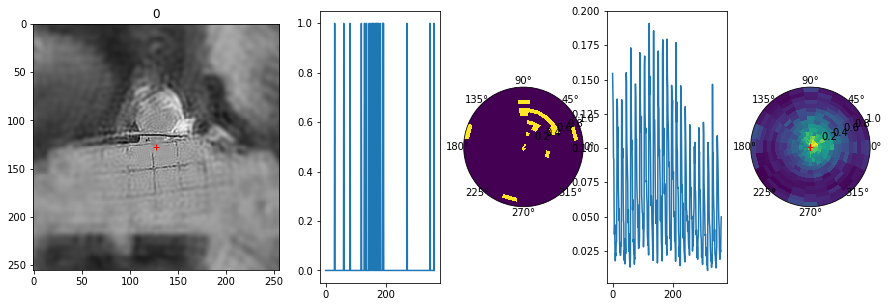

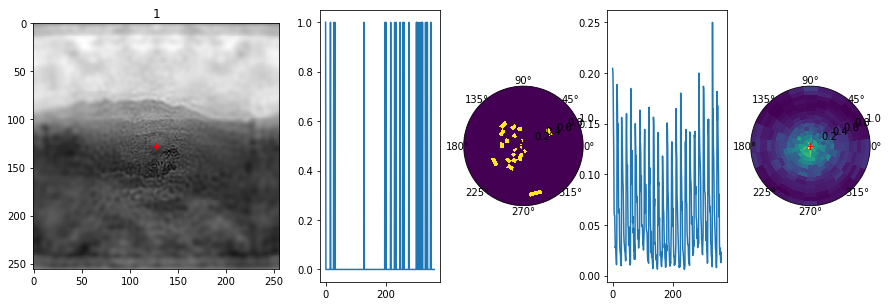

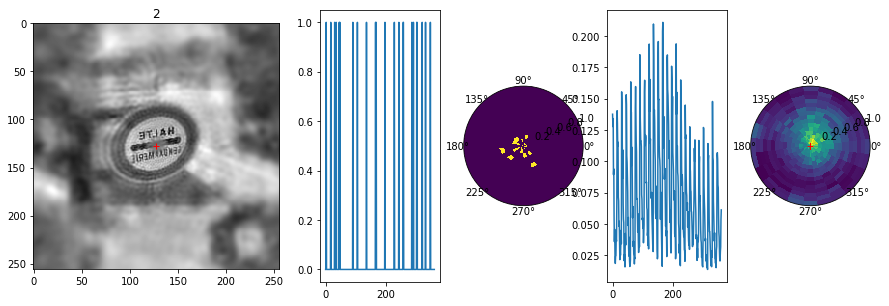

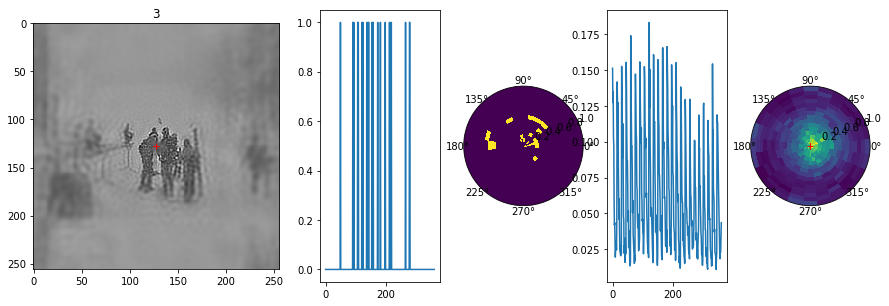

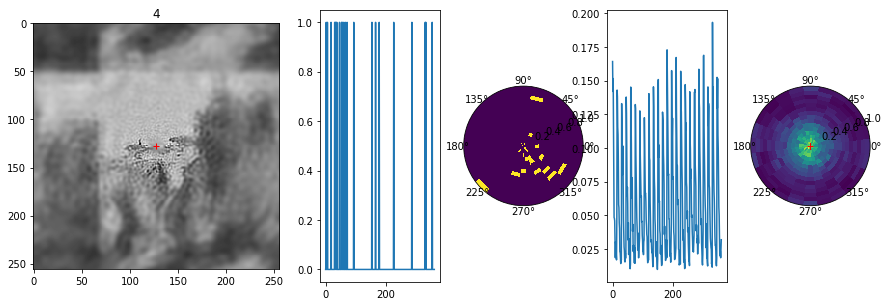

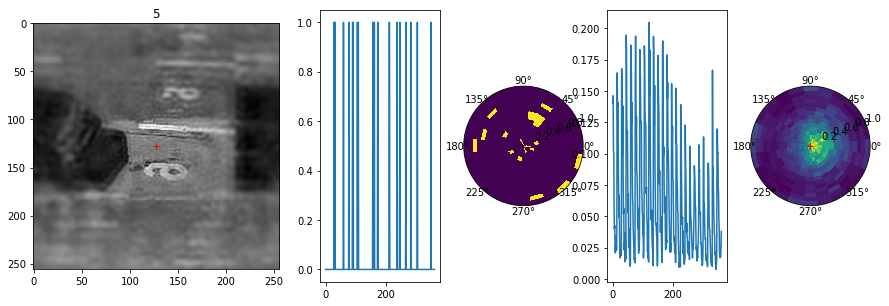

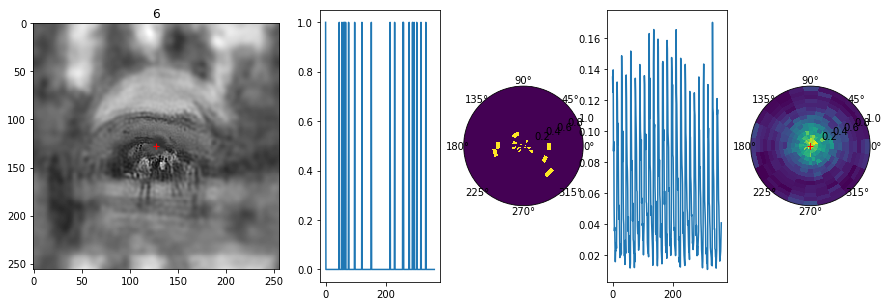

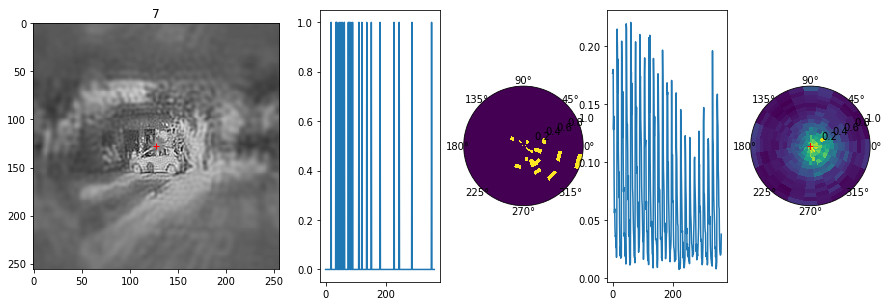

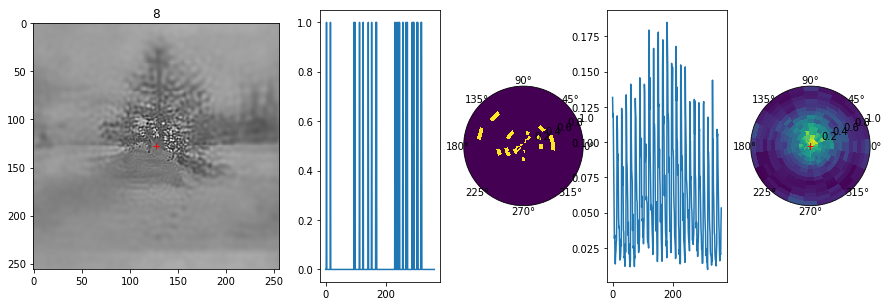

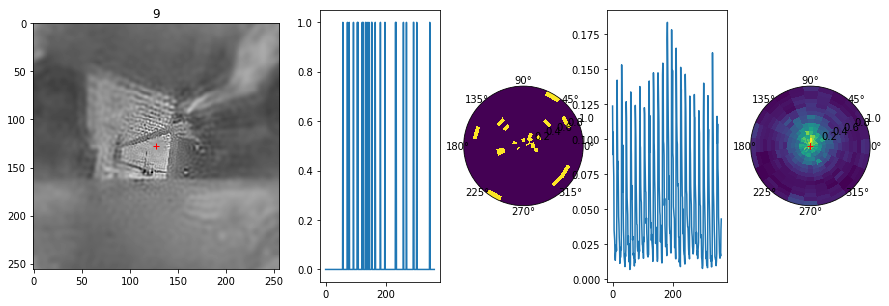

In [160]:
batch = next(iter(test_loader))
#batch = next(iter(train_loader))
for _ in range(10):
    image = colliculus_inverse @ batch['image'][_,:]
    image_white = retina_inverse @ batch['image_white'][_,:]
    plt.figure(figsize = (15, 5))
    
    #plt.subplot(161)
    #plt.plot(batch['image_white'][_,:])
    plt.subplot(131)
    plt.imshow(image_white.reshape(N_X, N_X) * 20 + image.reshape(N_X, N_X) , cmap = 'gray')
    plt.plot(N_X/2 - 0.5, N_Y/2 - 0.5, 'r+')
    plt.title(_)
    plt.subplot(163)
    plt.plot(batch['fixation'][_,:])    
    #col = colliculus_inverse @ batch['fixation'][_,:]
    ax = plt.subplot(164, projection='polar')
    vec = batch['fixation'][_,:]
    ax.pcolor(theta, log_r, vec.reshape((N_azimuth, N_eccentricity)))
    #plt.imshow(col.reshape(128, 128))
    in_ = batch['image'][_,:].float()
    in_white = batch['image_white'][_,:].float()
    out = net(in_, in_white)
    plt.subplot(165)
    out_sig = F.sigmoid(out).detach().numpy()
    plt.plot(out_sig) #.detach().numpy()) #_sig)    
    #view = colliculus_inverse @ out_sig
    ax = plt.subplot(166, projection='polar')
    ax.pcolor(theta, log_r, out_sig.reshape((N_azimuth, N_eccentricity)))
    plt.plot(0,0,'r+')
    #plt.imshow(view.reshape(128, 128))
                                 

In [ ]:
print('\a')